# GRADIENT DESCENT

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [6]:
data = pd.read_csv('../Data/4_1_data.csv') # son dos puentos
data.head()

,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   score-1  100 non-null    float64
 1   score-2  100 non-null    float64
 2   label    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
scores = data[['score-1','score-2']].values # creo un nuevo dataset que se llame scores con los valores de los dos resultados de los examenes

In [7]:
results =data['label'].values #creo el dataframe de resultado

In [9]:
aprobar = (results == 1).reshape(100,1)
suspender = (results == 0). reshape(100,1)

# Visualizamos los Datos

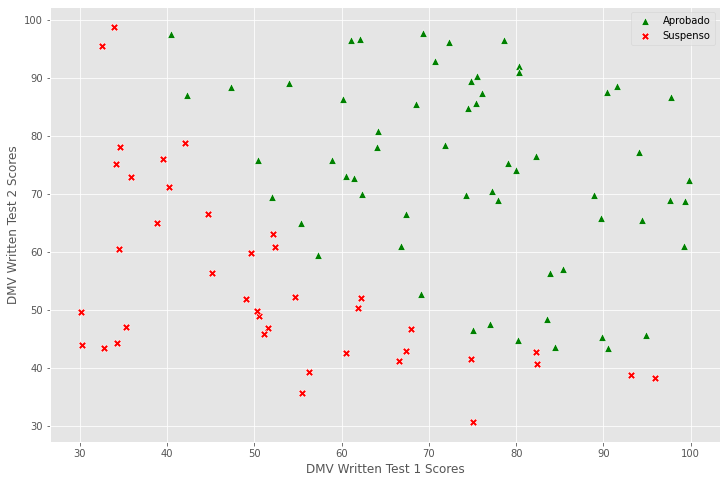

In [10]:
ax = sns.scatterplot(x = scores[aprobar[:,0],0],
                    y = scores[aprobar[:,0],1],
                     marker = "^",
                     color = "green",
                     s = 60)
sns.scatterplot(x = scores[suspender[:,0],0],
                    y = scores[suspender[:,0],1],
                     marker = "X",
                     color = "red",
                     s = 60)
ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")
ax.legend(["Aprobado", "Suspenso"])
plt.show();

# Por problemas de clasificación hacemos un plot de las variables independientes, una contra la otra para identificar las clases
# y observar su relación. Necesitamos diferenciar la combinación que me lleva a aprobar y cual ha suspender

# Logsitic Sigmoid Function

Logistic Sigmoid Function $\sigma(z)$
he objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$
where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [12]:
def logistic_function(x):    # activate function la función se "activara" y creara la funcion S. 
    return 1/ (1 + np.exp(-x)) # Me diferencia una regresión logistica de una lineal
logistic_function(0)

0.5

In [13]:
def compute_cost(theta, x, y):
    m = len(y) # me indica el número de dimensiones que vamos a utilizar que coincide con las dimensiones de Theta
    y_pred = logistic_function(np.dot(x , theta)) #computa el producto entre el peso y el m
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred)) #Loss error = ½ (predicted value – actual value)2
    cost = -1 / m * sum(error) #Defindo la función coste
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y)) #Defino cual es la función del gradiente
    # es igual al producto de la traspuesta de m y el error dividio por el número de samples
    return cost[0] , gradient

#Lo que me devuelve es la regresion logisitica de la función de coste

# Inicializacion del Gradiente y la Función de Coste

In [15]:
#Normalizamos para evitar problemas de multivariedad.

mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores #standardization 

rows = scores.shape[0] # el número total de samples
cols = scores.shape[1] # el número total de feautures

X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
# Inserto una columna de 1s como primera entrada en el nuevo vector, se trata de un pequeño truco que nos permite introducir
# el "bias" como un parámetro dentro del peso de la matriz, en vez de como una variable separada


y = results.reshape(rows, 1)
# Creamos la matriz de peso para que tenga el mismo número de columnas que nuestro imput.

theta_init = np.zeros((cols + 1, 1)) # esto es el procesos de initalization, que me indica donde empieza la fuunción
#suele ser siempre 0

#Cost function basically means how much far away your predicted line is from the actual points that we were already given
cost, gradient = compute_cost(theta_init, X, y)
#Calculates cost of the function.X & y have their usual meaning.theta - vector of coefficients.
#the cost function evaluates the performance of the model on the training data given a set of model parameters.

print("Cost at initialization", cost) #El coste de Theta inicial es 
print("Gradient at initialization:", gradient) # El gradiente inicial de theta es 

Cost at initialization 0.693147180559946
Gradient at initialization: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


# Descenso del Gradiente

In [17]:
def gradient_descent(x, y, theta, alpha, iterations):
    "Coge un array de x,y y theta, donde vayas actualizando theta por iteraciones y teniendo en cuenta la velocidad"
    "del aprndizaje"
    "Devuelveme el valor de theta y la lista de coste de theta para cada iteracion"
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs

In [1]:
theta, costs = gradient_descent(X, y, theta_init, 1, 200)

NameError: name 'gradient_descent' is not defined

In [19]:

print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
Resulting cost: 0.20489382036036602


# Recta de las iteraciones sobre el Descenso del Gradiente

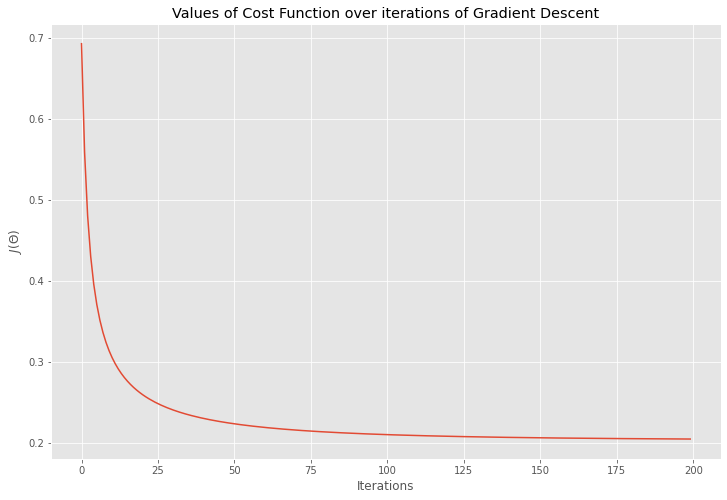

In [20]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

# Plotting the decision boundary

Next is the plotting of the decision boundary using the optimized theta.


$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

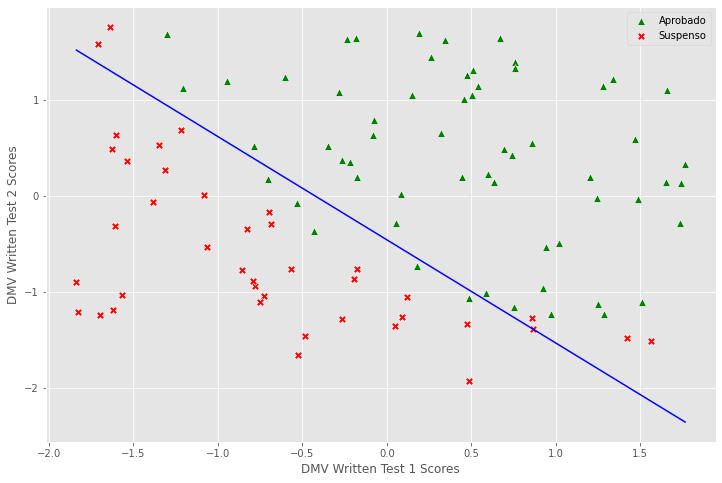

In [21]:
ax = sns.scatterplot(x = scores[aprobar[:,0],0],
                    y = scores[aprobar[:,0],1],
                     marker = "^",
                     color = "green",
                     s = 60)
sns.scatterplot(x = scores[suspender[:,0],0],
                    y = scores[suspender[:,0],1],
                     marker = "X",
                     color = "red",
                     s = 60)
ax.legend(["Aprobado", "Suspenso"])
ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")
x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])]) # defino los valores de x
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2] # defino los valore de y 
ax.legend(["Aprobado", "Suspenso"])
sns.lineplot(x = x_boundary, y = y_boundary, color="blue")
plt.show()

#  Predictions using the optimized $\theta$ values


$h_\theta(x) = x\theta$

In [22]:
test = np.array([50,79])
test = (test - mean_scores)/std_scores
test = np.append(np.ones(1), test)
probability = logistic_function(test.dot(theta))
print("A person who scores 50 and 79 on their DMV written tests have a",
      np.round(probability[0], 2),"probability of passing.")

A person who scores 50 and 79 on their DMV written tests have a 0.71 probability of passing.


# Accuracy

In [23]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0
p=classifierPredict(theta,X)
print("Train Accuracy:", sum(p==y)[0],"%")

#Computa el porcentaje de correcta clasificación de nuestro training set.
#The classifierPredict function returns a boolean array with True if the probability of admission into university is more than 0.5 and False otherwise. 
#Taking the sum(p==y) adds up all instances where it correctly predicts the y values.

Train Accuracy: 89 %
